Importing Dependencies

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import csv
import sklearn
import pickle
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold,cross_val_score,learning_curve

Data Collections and Pre-Processing

In [6]:
#Loading the data from csv file to a pandas dataFrame
dataset=pd.read_csv("email.csv",encoding='latin-1')

In [7]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
dataset.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [9]:
raw_mail_dataset=dataset.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
print(raw_mail_dataset)

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [10]:
raw_mail_dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
raw_mail_dataset.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [12]:
#Replace nul values with a null string
mail_data=raw_mail_dataset.where((pd.notnull(raw_mail_dataset)),"")

In [13]:
#Printing the first 5 rows of the dataset
mail_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#Checking the number of rows and columns in the dataframe
mail_data.shape

(5572, 2)

Label Encoding

In [15]:
#Label spam mail as 0 and ham mail as 1
mail_data.loc[mail_data["v1"]=="spam","v1",]=0
mail_data.loc[mail_data["v1"]=="ham","v1",]=1

In [16]:
#Seperating the data as texts and label
X=mail_data["v2"]
Y=mail_data["v1"]

In [17]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object


In [18]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: object


Splitting the data into training and testing data

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [20]:
print(X.shape,X_train.shape,X_test.shape)

(5572,) (4457,) (1115,)


Feature Extraction

In [21]:
#Transform the text data to faeture vectors that can be used as input to the logistic regression
feature_extraction=TfidfVectorizer(min_df=1,stop_words="english",lowercase=True)
X_train_features=feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)
#Covert Y_train and Y_test values as integers
Y_train=Y_train.astype("int")
Y_test=Y_test.astype("int")

In [22]:
print(X_train)

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: v2, Length: 4457, dtype: object


In [23]:
print(X_train_features)

  (0, 741)	0.3219352588930141
  (0, 3979)	0.2410582143632299
  (0, 4296)	0.3891385935794867
  (0, 6599)	0.20296878731699391
  (0, 3386)	0.3219352588930141
  (0, 2122)	0.38613577623520473
  (0, 3136)	0.440116181574609
  (0, 3262)	0.25877035357606315
  (0, 3380)	0.21807195185332803
  (0, 4513)	0.2909649098524696
  (1, 4061)	0.380431198316959
  (1, 6872)	0.4306015894277422
  (1, 6417)	0.4769136859540388
  (1, 6442)	0.5652509076654626
  (1, 7443)	0.35056971070320353
  (2, 933)	0.4917598465723273
  (2, 2109)	0.42972812260098503
  (2, 3917)	0.40088501350982736
  (2, 2226)	0.413484525934624
  (2, 5825)	0.4917598465723273
  (3, 6140)	0.4903863168693604
  (3, 1599)	0.5927091854194291
  (3, 1842)	0.3708680641487708
  (3, 7453)	0.5202633571003087
  (4, 2531)	0.7419319091456392
  :	:
  (4452, 2122)	0.31002103760284144
  (4453, 999)	0.6760129013031282
  (4453, 7273)	0.5787739591782677
  (4453, 1762)	0.45610005640082985
  (4454, 3029)	0.42618909997886
  (4454, 2086)	0.3809693742808703
  (4454, 3088)

Training the Model

Logistic Regression

In [24]:
model= LogisticRegression()

In [25]:
#Training the Logistic Regression model using the training data
model.fit(X_train_features,Y_train)

LogisticRegression()

Evaluating the trained model

In [26]:
#Prediction on training data
prediction_on_training_data=model.predict(X_train_features)
accuracy_on_training_data=accuracy_score(Y_train,prediction_on_training_data)

In [27]:
print("Accuracy on training data = ",accuracy_on_training_data)

Accuracy on training data =  0.9661207089970832


In [28]:
#Prediction on test data
prediction_on_testing_data=model.predict(X_test_features)
accuracy_on_testing_data=accuracy_score(Y_test,prediction_on_testing_data)

In [29]:
print("Accuracy on testing data = ",accuracy_on_testing_data)

Accuracy on testing data =  0.9623318385650225


Buiding a predictive system

In [30]:
input_mail=["I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."]
#Convert text to feature vector
input_data_features=feature_extraction.transform(input_mail)
#Mking prediction
prediction=model.predict(input_data_features)
print(prediction)
if (prediction[0]==1):
    print("Ham Mail")
else:
    print("Spam Mail")

[1]
Ham Mail


In [31]:
input_mail=["SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info"]
#Convert text to feature vector
input_data_features=feature_extraction.transform(input_mail)
#Mking prediction
prediction=model.predict(input_data_features)
print(prediction)
if (prediction[0]==1):
    print("Ham Mail")
else:
    print("Spam Mail")

[0]
Spam Mail


In [32]:
import nltk
nltk.download("punkt")
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to C:\Users\Sneha
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
ham_words = ''
spam_words = ''

In [41]:
# Creating a corpus of spam messages
for val in mail_data[mail_data['v1'] == 0].v2:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ' '

# Creating a corpus of ham messages
for val in mail_data[mail_data['v1'] == 1].v2:
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '

In [42]:
spam_wordcloud = WordCloud(width=500, height=300).generate(spam_words)
ham_wordcloud = WordCloud(width=500, height=300).generate(ham_words)

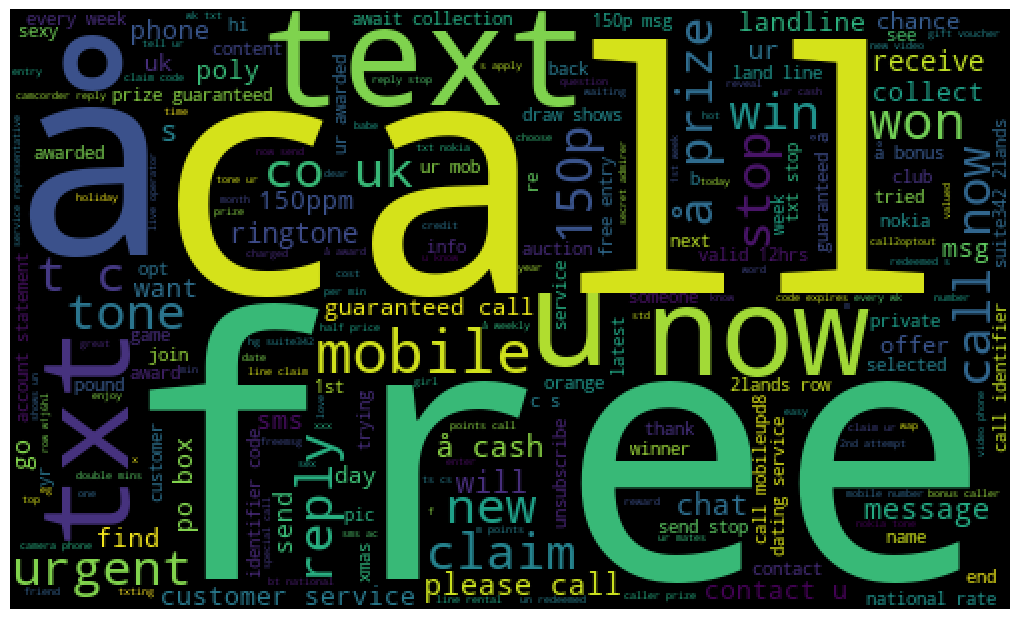

In [43]:
#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

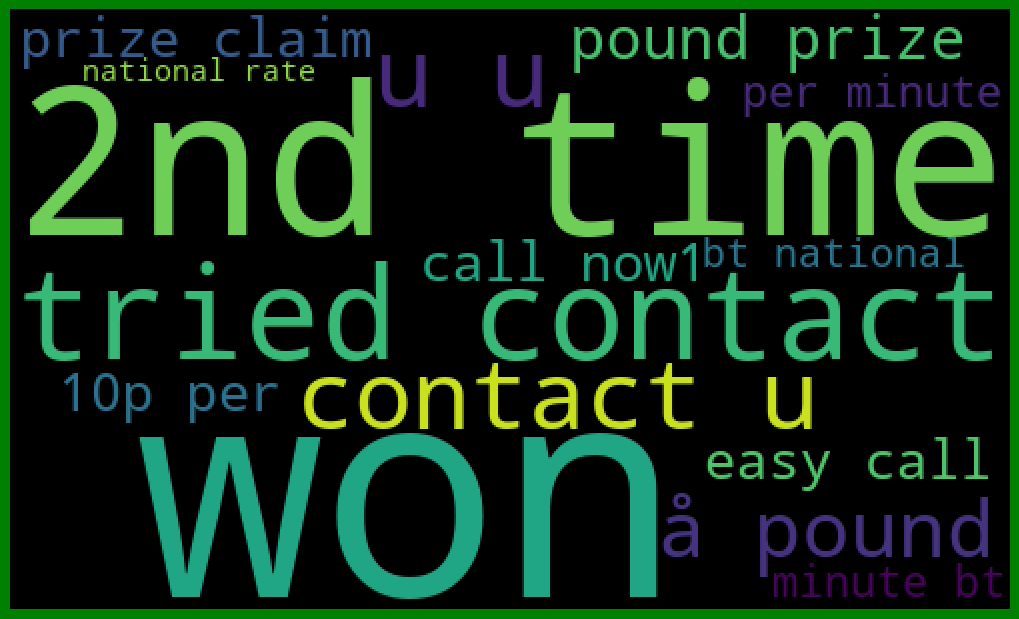

In [44]:
#Creating Ham wordcloud
plt.figure( figsize=(10,8), facecolor='g')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()